In [4]:
# notebook magic to display plots
%matplotlib inline
# notebook magic to auto reload imported modules when changes are made to them 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from hypothesis import *

In [6]:
raw = pd.read_csv("shot_logs.csv")
raw.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


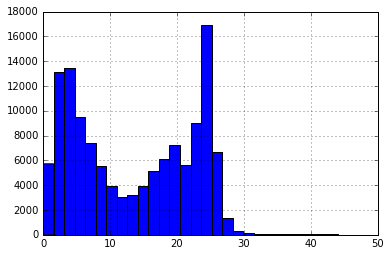

In [7]:
#print raw['SHOT_DIST'].mean()
raw['SHOT_DIST'].hist(bins =30)

In [8]:
#look at the shooting stats for each second shot-clock buckets
clock_tick = list(range(0,25))
trueList = []
falseList = []
for x in clock_tick:
    temp = shot_n_clock[(shot_n_clock.SHOT_CLOCK <= x) & (shot_n_clock.SHOT_CLOCK > x-1)].groupby("IS_SHOT_MADE").SHOT_RESULT.count() 
    trueList.append(temp[1])
    falseList.append(temp[0])      
    
#Building output dataframe, calculating % column    
final = pd.DataFrame({"sec_left": clock_tick, "True": trueList, "False": falseList})
final['FG%'] = np.round(final['True'] / (final['True'] + final['False']) * 100, 2)
print(final)

NameError: name 'shot_n_clock' is not defined

**Investigating Home Court Advantage**

We start by comparing the field goal percentage of teams playing home and away

In [9]:
shot_n_court = pd.concat([raw.SHOT_RESULT, raw.LOCATION], axis=1)
shot_n_court["MADE"] = (shot_n_court.SHOT_RESULT == 'made')
home_stats = shot_n_court[shot_n_court.LOCATION =='H'].groupby("MADE").SHOT_RESULT.count()
away_stats = shot_n_court[shot_n_court.LOCATION =='A'].groupby("MADE").SHOT_RESULT.count()
totals =[0]*2 #total number of shots attempted for H an A teams
totals[0] = float(sum(home_stats))
totals[1] = float(sum(away_stats)) 
shots_missed = np.append(home_stats[0]/totals[0],away_stats[0]/totals[1])
shots_missed = [x*100 for x in shots_missed]
shots_made = [100-missed_perc for missed_perc in shots_missed]

/home/vagrant/miniconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


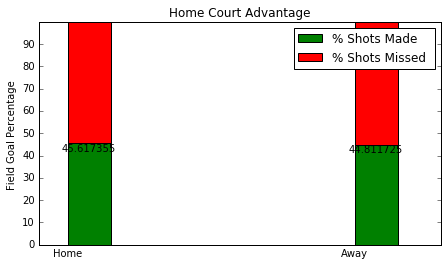

In [10]:
plot_court_advantage(shots_made, shots_missed)

We can see that on average teams at home have a slightly higher field goal percentage rate. This is consistant with what we already knew which is that home teams have a higher win percentage. However we still do not have enough information whether the location of the court will have an impact on the probability of a single shot going in. 


**Shot Clock Usage**

In [11]:
shot_n_clock = pd.concat([raw.SHOT_RESULT, raw.SHOT_CLOCK], axis=1)
shot_n_clock["IS_SHOT_MADE"] = (shot_n_clock.SHOT_RESULT == 'made')


shot_n_clock.SHOT_CLOCK.describe()

count    122502.000000
mean         12.453344
std           5.763265
min           0.000000
25%           8.200000
50%          12.300000
75%          16.675000
max          24.000000
Name: SHOT_CLOCK, dtype: float64

In [12]:
#look at the shooting stats for each second shot-clock buckets
clock_tick = list(range(0,25))
trueList = []
falseList = []
for x in clock_tick:
    temp = shot_n_clock[(shot_n_clock.SHOT_CLOCK <= x) & (shot_n_clock.SHOT_CLOCK > x-1)].groupby("IS_SHOT_MADE").SHOT_RESULT.count() 
    trueList.append(temp[1])
    falseList.append(temp[0])      
    
#Building output dataframe, calculating % column    
final = pd.DataFrame({"sec_left": clock_tick, "True": trueList, "False": falseList})
final['FG%'] = np.round(final['True'] / (final['True'] + final['False']) * 100, 2)
print(final)

    False  True  sec_left    FG%
0      63    15         0  19.23
1     898   352         1  28.16
2    1492   753         2  33.54
3    1796  1062         3  37.16
4    2109  1377         4  39.50
5    2326  1579         5  40.44
6    2766  2089         6  43.03
7    3149  2258         7  41.76
8    3258  2569         8  44.09
9    3800  2931         9  43.54
10   4014  3281        10  44.98
11   4250  3392        11  44.39
12   4400  3563        12  44.74
13   4184  3553        13  45.92
14   4254  3340        14  43.98
15   4016  3218        15  44.48
16   3669  3008        16  45.05
17   3023  2631        17  46.53
18   2767  2398        18  46.43
19   2590  2389        19  47.98
20   2201  2411        20  52.28
21   1596  2285        21  58.88
22    976  1538        22  61.18
23    809   940        23  53.74
24   2216  2948        24  57.09


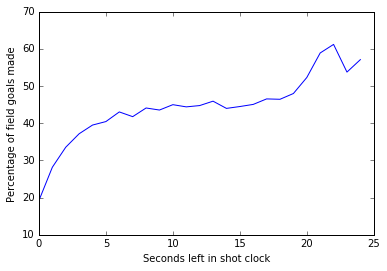

In [13]:
plt.plot(final['sec_left'], final['FG%'])
plt.xlabel("Seconds left in shot clock")
plt.ylabel("Percentage of field goals made")
plt.show()